## Project01 Code

For this assignment, you will explore the use of logistic regression for image classifcation. 

You will hand in a PDF containing results and analysis, along with the usual collaborators file; you do not hand in code for this assignment. 

You will also submit a text-file containing predictions of a classifer that you built; these results will be used to score your code on a leaderboard, based upon accuracy on a provided testing set (for which you do not know the correct outputs).


## Part Zero: Collaborators file (5 points)

Provide the usual file containing your name, the amount of time you worked on the assignment,
and any resources or individuals you consulted in your work.

## Import required libraries

In [87]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import cv2

## Load the Dataset

In [4]:
# Load the x-data and y-class arrays
x_train = np.loadtxt('./data_digits_8_vs_9_noisy/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_digits_8_vs_9_noisy/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data_digits_8_vs_9_noisy/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data_digits_8_vs_9_noisy/y_test.csv', delimiter=',', skiprows=1)

## Part One: Logistic Regression for Digit Classifcation (25 points)

You have been given data (in data_digits_8_vs_9_noisy) corresponding to images of hand-written digits (8 and 9 in particular).* 

As before, this data has been split into various training,and testing sets; each set is given in CSV form, and is divided into inputs (x) and outputs (y).

Each row of the input data consists of pixel data from a (28 x28) image with gray-scale values
between 0:0 (black) and 1:0 (white); this pixel data is thus represented as a single feature-vector of
length 282 = 784 such values. The output data is a binary label, with 0 representing an 8, and 1
representing a 9.

1. (5 pts.) You will fit logistic regression models to the training data, using sklearn's implementation of the model, with the liblinear solver:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Leaving all other parameters with default values, you will explore what happens when we limit the iterations allowed for the solver to converge on its solution.

For the values i = 1; 2; : : : ; 40, build a logistic regression model with the max_iter set to i. Fit each such model to the training data, and keep track of the accuracy of the resulting model (via the model's own score() function) along with the logistic loss, each measured on the training data.

Produce two plots, each with the values of i as x-axis and with the accuracy/loss, respectively, as y. Place these plots into your PDF document, with captions labeling each appropriately. Below the plots, discuss the results you are seeing; what do they show, and why?

c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_

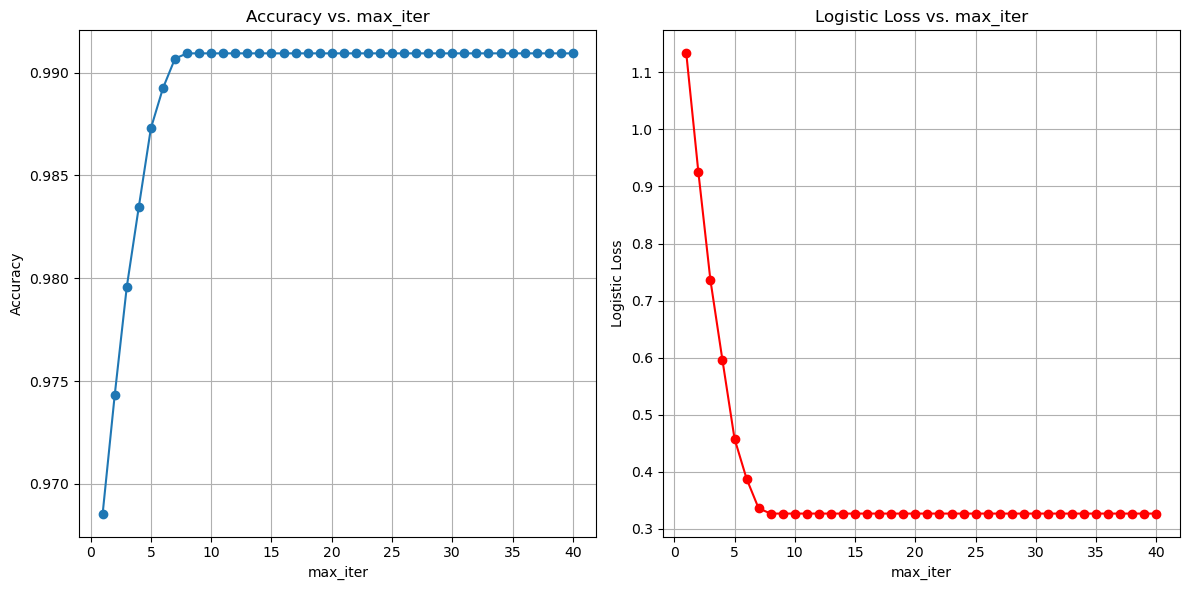

In [51]:
max_iters = range(1, 41)
accuracies = []
losses = []

for i in max_iters:
    # Create a logistic regression model with the given max_iter value
    model = LogisticRegression(solver='liblinear', max_iter=i)
    
    # Fit the model to the training data
    model.fit(x_train, y_train)
    
    # Calculate the accuracy on the training data
    accuracy = model.score(x_train, y_train)
    
    # Calculate the logistic loss on the training data
    y_pred = model.predict(x_train)
    loss = log_loss(y_train, y_pred)
    
    accuracies.append(accuracy)
    losses.append(loss)

# Create a single figure with two subplots
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(max_iters, accuracies, marker='o')
plt.title('Accuracy vs. max_iter')
plt.xlabel('max_iter')
plt.ylabel('Accuracy')
plt.grid()

# Plot logistic loss
plt.subplot(1, 2, 2)
plt.plot(max_iters, losses, marker='o', color='r')
plt.title('Logistic Loss vs. max_iter')
plt.xlabel('max_iter')
plt.ylabel('Logistic Loss')
plt.grid()

plt.tight_layout()
plt.show()


2. (5 pts.) After fitting a logistic model, you can access the weights it assigns to each feature in the data using its coef_ attribute. For each of the i models you generated, record the first such weight, which is the one the model applies to feature pixel000 in the input data. Produce a plot with the values of i as x-axis and with the feature weight as y. Place this plot into your PDF document, with a caption labeling it appropriately. Below the plot, discuss
the results you are seeing; what do they show, and why?

c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_

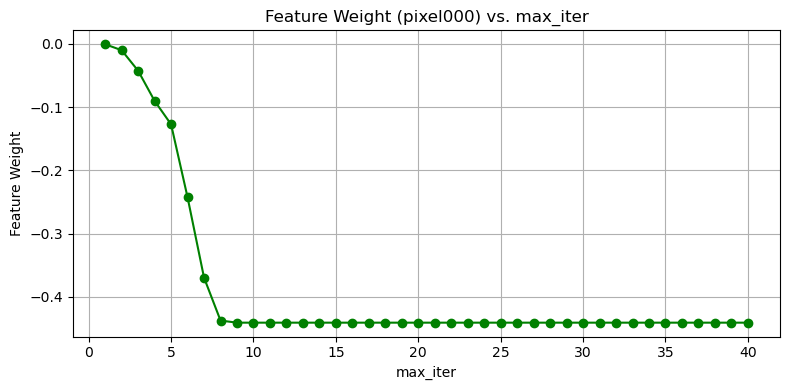

In [119]:
weights_pixel000 = []

for i in max_iters:
    model = LogisticRegression(solver='liblinear', max_iter=i)
    model.fit(x_train, y_train)
    
    # Access the weight for "pixel000"
    weight_pixel000 = model.coef_[0][0]  # Assuming "pixel000" is the first feature
    weights_pixel000.append(weight_pixel000)

plt.figure(figsize=(8, 4))

plt.plot(max_iters, weights_pixel000, marker='o', color='g')
plt.title('Feature Weight (pixel000) vs. max_iter')
plt.xlabel('max_iter')
plt.ylabel('Feature Weight')
plt.grid()

plt.tight_layout()
plt.show()

3. (5 pts.) As in prior homework assignments, you will explore different values of regularization penalty for the logistic model.z Your code should explore a range of values for this parameter, using a regularly-spaced grid of values:

C_grid = np.logspace(-9, 6, 31)
for C in C_grid:

Build and evaluate model for each value C

For each such value of C create a model and fit it to the training data, and then compute the log loss of that model on the test data. Determine which value gives you the least loss on the test data. Record that value, along with the accuracy score of the model, in your PDF. Also include a table for the confusion matrix of that model on the test data.

In [50]:
C_grid = np.logspace(-9, 6, 31)
lossarray = []
accuracyarray = []

best_C = None
best_log_loss = float('inf')
best_accuracy = 0

for C in C_grid:
    # Create a logistic regression model with the current C value
    model = LogisticRegression(solver='liblinear', C=C)
    
    # Fit the model to the training data
    model.fit(x_train, y_train)
    
    # Calculate log loss on the test data
    y_pred = model.predict(x_test[:1983])
    loss = log_loss(y_test, y_pred)
    lossarray.append(loss)
    
    # Calculate accuracy on the test data
    accuracy = accuracy_score(y_test, y_pred)
    accuracyarray.append(accuracy)
    
    # Update best values if the current model is better
    if loss < best_log_loss:
        best_C = C
        best_log_loss = loss
        best_accuracy = accuracy

# Create a logistic regression model with the best C value
best_model = LogisticRegression(solver='liblinear', C=best_C)

# Fit the best model to the training data
best_model.fit(x_train, y_train)

# Calculate log loss on the test data for the best model
y_pred = best_model.predict(x_test[:1983])
best_loss = log_loss(y_test, y_pred)

# Generate the confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(data=conf_matrix, columns=[0, 1], index=[0, 1])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'True'

# ... (previous code)

accuracyarray.sort()
lossarray.sort()

print("Confusion Matrix:")
print(cm_df)

print("Sorted Accuracy Array:")
print(accuracyarray)

print("Sorted Log Loss Array:")
print(lossarray)

print("Best Accuracy: " + str(best_accuracy))
print("Best Log Loss: " + str(best_loss))


Confusion Matrix:
Predicted    0    1
True               
0          672  302
1          673  336
Sorted Accuracy Array:
[0.4826021180030257, 0.48663640948058495, 0.4891578416540595, 0.49016641452344933, 0.49067070095814425, 0.49067070095814425, 0.49117498739283916, 0.49117498739283916, 0.49117498739283916, 0.49117498739283916, 0.49117498739283916, 0.49117498739283916, 0.49117498739283916, 0.491679273827534, 0.4921835602622289, 0.4921835602622289, 0.49268784669692384, 0.49268784669692384, 0.49319213313161875, 0.49369641956631366, 0.49420070600100857, 0.4952092788703984, 0.49672213817448313, 0.4987392839132627, 0.4987392839132627, 0.49924357034795763, 0.5012607160867373, 0.5012607160867373, 0.5032778618255169, 0.5042864346949067, 0.5083207261724659]
Sorted Log Loss Array:
[17.721917324452452, 17.86732792814027, 17.90368057906222, 17.97638588090613, 17.976385880906133, 18.049091182750036, 18.067267508211014, 18.067267508211014, 18.139972810054925, 18.19450178643785, 18.230854437359806, 1

4. (5 pts.) Analyze some of the mistakes that your best model makes. Produce two plots, one consisting of 9 sample images that are false positives in the test set, and one consisting of 9 false negatives. You can display the images by converting the pixel data using the matplotlib function imshow(), using the Grey colormap, with vmin=0.0 and vmax=1.0. Place each plot into your PDF as a properly captioned figure. Below the figures, discuss the results you are seeing. What mistakes is the classifer making?

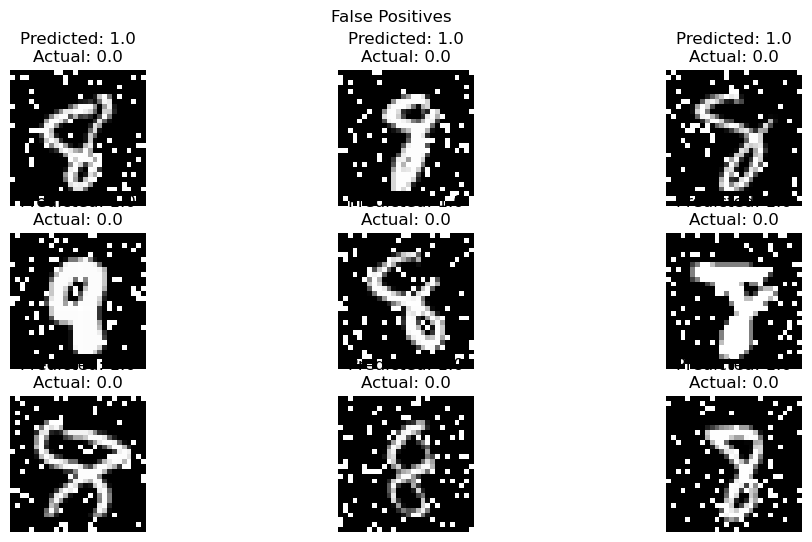

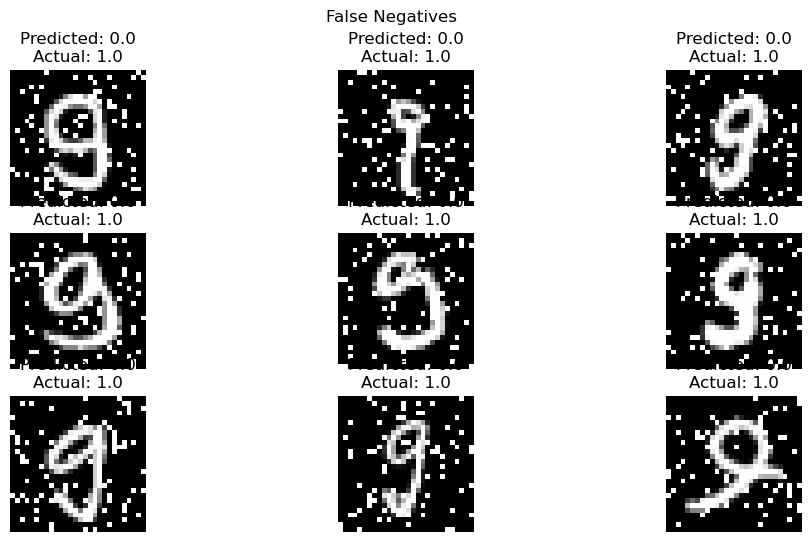

In [38]:
false_positives = (y_pred == 1) & (y_test == 0)  # Model predicted 9, actual is 8
false_negatives = (y_pred == 0) & (y_test == 1)  # Model predicted 8, actual is 9

# Create a figure for false positives
plt.figure(figsize=(12, 6))
plt.suptitle("False Positives")

for i, idx in enumerate(np.where(false_positives)[0][:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray', vmin=0.0, vmax=1.0)
    plt.title(f"Predicted: {y_pred[idx]}\nActual: {y_test[idx]}")
    plt.axis('off')

# Save or display the figure
plt.savefig("false_positives.png")  # Save the figure if needed
plt.show()

# Create a figure for false negatives
plt.figure(figsize=(12, 6))
plt.suptitle("False Negatives")

for i, idx in enumerate(np.where(false_negatives)[0][:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray', vmin=0.0, vmax=1.0)
    plt.title(f"Predicted: {y_pred[idx]}\nActual: {y_test[idx]}")
    plt.axis('off')

# Save or display the figure
plt.savefig("false_negatives.png")  # Save the figure if needed
plt.show()

5. (5 pts.) Analyze all of the final weights produced by your classifer. Reshape the weight coefficients into a (28 x 28) matrix, corresponding to the pixels of the original images, and plot the result using imshow(), with colormap RdYlBu, vmin=-0.5, and vmax=0.5.x Place this plot into your PDF as a properly captioned figure. Below it, discuss what it shows.
Which pixels correspond to an 8 (have negative weights), and which correspond to a 9 (have positive weights)? Why do you think this is the case?

(-0.5, 27.5, 27.5, -0.5)

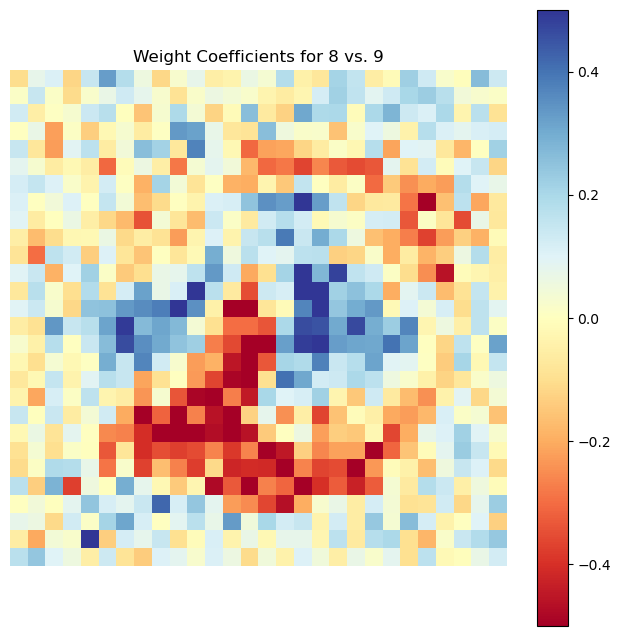

In [39]:
weight_matrix = best_model.coef_.reshape(28, 28)

plt.figure(figsize=(8, 8))
plt.imshow(weight_matrix, cmap='RdYlBu', vmin=-0.5, vmax=0.5)
plt.title("Weight Coefficients for 8 vs. 9")
plt.colorbar()
plt.axis('off')

## Part Two: Trousers v. Dresses (45 points)
We have also provided some image data, in the same format as before, of trousers (output label 1) and dresses (output label 0). We have again given you input and output data for a training set,along with input data only for a test set. Your task is to build a logistic regression classifer for this data. Your PDF for this part will describe your approach and the results you see.

When doing regression, you should explore different feature transformations, transforming the input features (in any way you see fit) that are given to the regression classifer. Your PDF should explain, as completely as you are able, what feature transformations you tried, and what processes
you used to build your classifer (parameters you tried like regularization penalty, etc.), along with the reasoning behind your decisions. Your work should contain at least two figures comparing the results you get by regression using the original features of the data and some modified features.
Your discussion should include the error rate on the testing data for various models, provided when you submit the model's predictions on that data (see next section). Overall, the entire write-up for this part of the assignment should take 2-3 pages, including figures.

For this part of the assignment, process is more important than raw results. A well-designed set of tests, with coherent explanation and careful comparison of results will be worth more than something that achieves 0 error, but is not explained clearly.

You may use any transformations of the existing data you like. Do not use any additional sources of data; use only the input sets provided, and feature transformations on those sets. Be creative in thinking about how to transform data; some ideas you might consider (we encourage you to try
other things as well):

* Consider things like histograms of parts of the data.
* Consider adding features that count overall numbers of white or black pixels.
* Consider adding features that capture spatial patterns in the original data.
* Consider exploring data augmentation, where you add to your data set via transformations of the data. For example, if you 
ip each image horizontally, you can double the training set
size without needing fundamentally new data.


## Load the Dataset

In [110]:
# Load the x-data and y-class arrays
x_train_part_two = np.loadtxt('./data_trouser_dress/troudress_train_x.csv', delimiter=',', skiprows=1)
x_test_part_two = np.loadtxt('./data_trouser_dress/troudress_test_x.csv', delimiter=',', skiprows=1)

y_train_part_two = np.loadtxt('./data_trouser_dress/troudress_train_y.csv', delimiter=',', skiprows=1)


1. (5 pts.) You will fit logistic regression models to the training data, using sklearn's implementation of the model, with the liblinear solver:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Leaving all other parameters with default values, you will explore what happens when we limit the iterations allowed for the solver to converge on its solution.

For the values i = 1; 2; : : : ; 40, build a logistic regression model with the max_iter set to i. Fit each such model to the training data, and keep track of the accuracy of the resulting model (via the model's own score() function) along with the logistic loss, each measured on the training data.

Produce two plots, each with the values of i as x-axis and with the accuracy/loss, respectively, as y. Place these plots into your PDF document, with captions labeling each appropriately. Below the plots, discuss the results you are seeing; what do they show, and why?

c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_

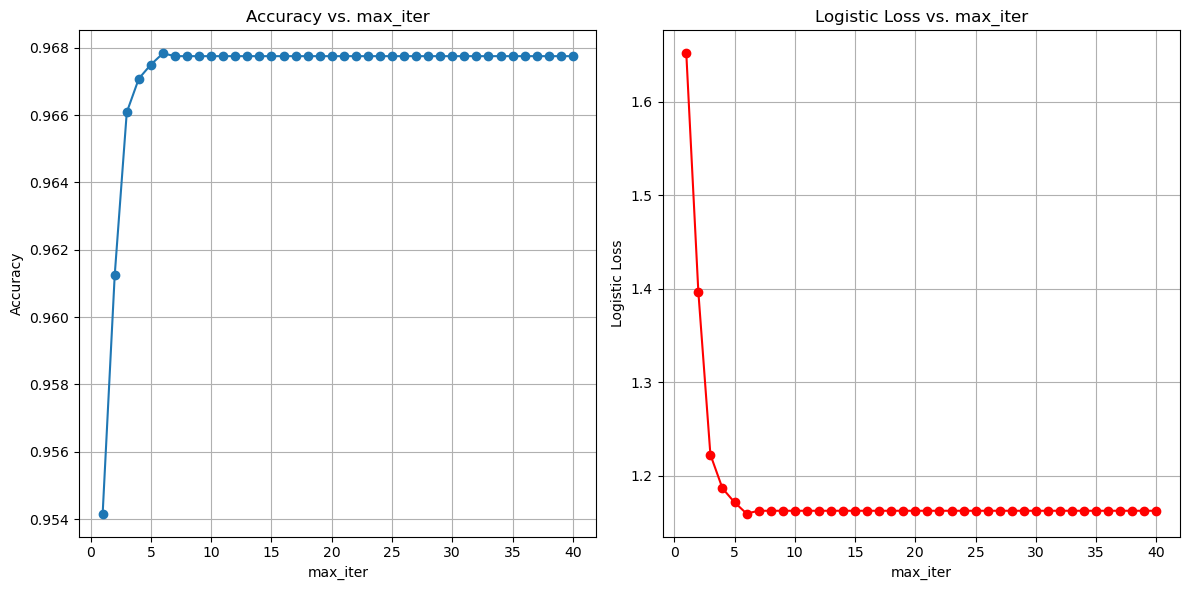

In [111]:
max_iters = range(1, 41)
accuracies = []
losses = []

for i in max_iters:
    # Create a logistic regression model with the given max_iter value
    model = LogisticRegression(solver='liblinear', max_iter=i)
    
    # Fit the model to the training data
    model.fit(x_train_part_two, y_train_part_two)
    
    # Calculate the accuracy on the training data
    accuracy = model.score(x_train_part_two, y_train_part_two)
    
    # Calculate the logistic loss on the training data
    y_pred = model.predict(x_train_part_two)
    loss = log_loss(y_train_part_two, y_pred)
    
    accuracies.append(accuracy)
    losses.append(loss)

# Create a single figure with two subplots
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(max_iters, accuracies, marker='o')
plt.title('Accuracy vs. max_iter')
plt.xlabel('max_iter')
plt.ylabel('Accuracy')
plt.grid()

# Plot logistic loss
plt.subplot(1, 2, 2)
plt.plot(max_iters, losses, marker='o', color='r')
plt.title('Logistic Loss vs. max_iter')
plt.xlabel('max_iter')
plt.ylabel('Logistic Loss')
plt.grid()

plt.tight_layout()
plt.show()


c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\adity\anaconda3\envs\ml135_env_

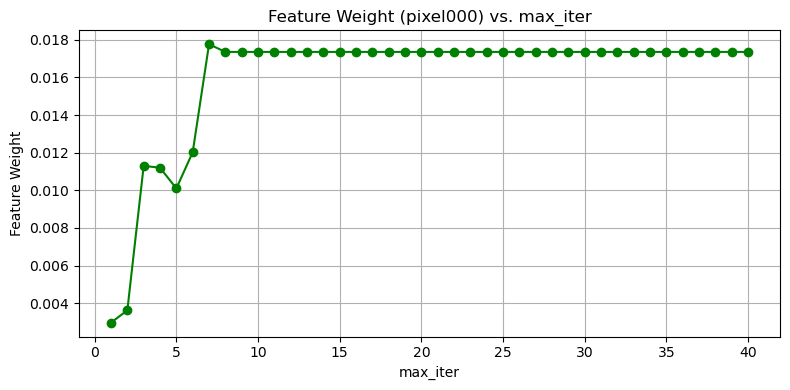

In [117]:
weights_pixel000 = []

for i in max_iters:
    model = LogisticRegression(solver='liblinear', max_iter=i)
    model.fit(x_train_part_two, y_train_part_two)
    
    # Access the weight for "pixel000"
    weight_pixel000 = model.coef_[0][0]  # Assuming "pixel000" is the first feature
    weights_pixel000.append(weight_pixel000)

plt.figure(figsize=(8, 4))

plt.plot(max_iters, weights_pixel000, marker='o', color='g')
plt.title('Feature Weight (pixel000) vs. max_iter')
plt.xlabel('max_iter')
plt.ylabel('Feature Weight')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
C_grid = np.logspace(-9, 6, 31)
lossarray = []
accuracyarray = []

best_C = None
best_log_loss = float('inf')
best_accuracy = 0

for C in C_grid:
    # Create a logistic regression model with the current C value
    model = LogisticRegression(solver='liblinear', C=C)
    
    # Fit the model to the training data
    model.fit(x_train_part_two, y_train_part_two)
    
    # Calculate log loss on the test data
    y_pred = model.predict(x_test_part_two)
    loss = log_loss(y_test, y_pred)
    lossarray.append(loss)
    
    # Calculate accuracy on the test data
    accuracy = accuracy_score(y_test, y_pred)
    accuracyarray.append(accuracy)
    
    # Update best values if the current model is better
    if loss < best_log_loss:
        best_C = C
        best_log_loss = loss
        best_accuracy = accuracy

# Create a logistic regression model with the best C value
best_model = LogisticRegression(solver='liblinear', C=best_C)

# Fit the best model to the training data
best_model.fit(x_train, y_train)

# Calculate log loss on the test data for the best model
y_pred = best_model.predict(x_test[:1983])
best_loss = log_loss(y_test, y_pred)

# Generate the confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(data=conf_matrix, columns=[0, 1], index=[0, 1])
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'True'

# ... (previous code)

accuracyarray.sort()
lossarray.sort()

print("Confusion Matrix:")
print(cm_df)

print("Sorted Accuracy Array:")
print(accuracyarray)

print("Sorted Log Loss Array:")
print(lossarray)

print("Best Accuracy: " + str(best_accuracy))
print("Best Log Loss: " + str(best_loss))


In [118]:
false_positives = (y_pred == 1) & (y_test == 0)  # Model predicted 9, actual is 8
false_negatives = (y_pred == 0) & (y_test == 1)  # Model predicted 8, actual is 9

# Create a figure for false positives
plt.figure(figsize=(12, 6))
plt.suptitle("False Positives")

for i, idx in enumerate(np.where(false_positives)[0][:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test_part_two[idx].reshape(28, 28), cmap='gray', vmin=0.0, vmax=1.0)
    plt.title(f"Predicted: {y_pred[idx]}\nActual: {y_test[idx]}")
    plt.axis('off')

# Save or display the figure
plt.savefig("false_positives.png")  # Save the figure if needed
plt.show()

# Create a figure for false negatives
plt.figure(figsize=(12, 6))
plt.suptitle("False Negatives")

for i, idx in enumerate(np.where(false_negatives)[0][:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test_part_two[idx].reshape(28, 28), cmap='gray', vmin=0.0, vmax=1.0)
    plt.title(f"Predicted: {y_pred[idx]}\nActual: {y_test[idx]}")
    plt.axis('off')

# Save or display the figure
plt.savefig("false_negatives.png")  # Save the figure if needed
plt.show()

ValueError: operands could not be broadcast together with shapes (12000,) (1983,) 

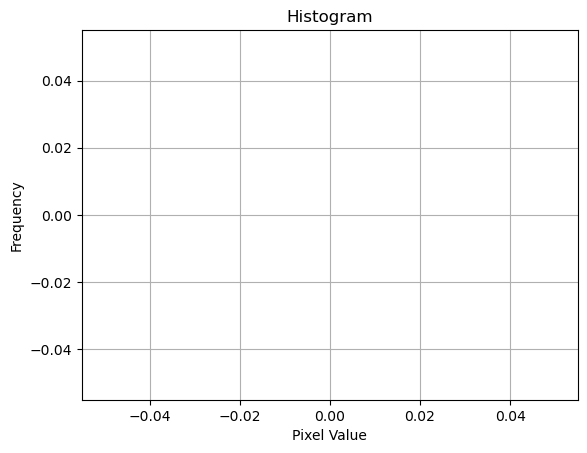

In [116]:
import cv2
import numpy as np

# Load the CSV file using NumPy
# Replace 'your_image.csv' with the actual file path
image_data = np.loadtxt('C:\\Users\\adity\\Tufts University Online MS CS\\Fall Sem\\Intro to Machine Learning\\project01\\src_data\\data_trouser_dress\\troudress_test_x.csv', delimiter=',', skiprows=1)

# Ensure that the loaded data is in the correct format (e.g., 2D array)
if len(image_data.shape) == 1:
    # If the data is 1D, it may need reshaping
    height, width = image_data.shape[0], 1
    image_data = image_data.reshape((height, width))

# Check if the image is loaded successfully
if image_data is not None:
    # Define the number of segments and their sizes
    num_segments = 4  # Number of segments
    segment_size = (image_data.shape[0] // num_segments, image_data.shape[1] // num_segments)  # Size of each segment
    
    # Initialize an empty list to store histograms
    histograms = []

    # Segment the image and compute histograms
    for i in range(num_segments):
        for j in range(num_segments):
            segment = image_data[i * segment_size[0]: (i + 1) * segment_size[0],
                            j * segment_size[1]: (j + 1) * segment_size[1]]
            
            # Compute histogram for the segment
            hist, _ = np.histogram(segment, bins=5, range=(0, 1))
            histograms.append(hist)
    
    # Now you have a list of histograms for each segment

    # Concatenate the histograms to create the feature vector
    feature_vector = np.concatenate(histograms)

    # Assuming you have the 'feature_vector'
  # You may need to adjust the number of bins based on your data
    num_bins = 5  # Number of bins for the histogram

 # Create a histogram plot
    plt.hist(feature_vector, bins=num_bins, range=(0, 1), density=True, color='b', alpha=0.7)
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)

 # Show the histogram plot
    plt.show()

    # You can further process or normalize the feature_vector as needed

    # Print the feature vector for testing
    #print(feature_vector)
else:
   print("Failed to load the image.")


In [112]:
import cv2
import numpy as np

# Load an example image (you should load your dataset)
image = cv2.imread('C:\Users\adity\Tufts University Online MS CS\Fall Sem\Intro to Machine Learning\project01\Part 2 regression.png', cv2.IMREAD_GRAYSCALE)

# Define the number of segments and their sizes
num_segments = 4  # Number of segments
segment_size = (image.shape[0] // num_segments, image.shape[1] // num_segments)  # Size of each segment

# Initialize an empty list to store histograms
histograms = []

# Iterate through segments
for i in range(num_segments):
    for j in range(num_segments):
        # Define the segment's ROI (Region of Interest)
        x1, x2 = i * segment_size[0], (i + 1) * segment_size[0]
        y1, y2 = j * segment_size[1], (j + 1) * segment_size[1]
        
        # Extract the segment
        segment = image[x1:x2, y1:y2]

        # Compute the histogram
        histogram, _ = np.histogram(segment, bins=256, range=(0, 256))

        # Normalize the histogram (optional)
        histogram = histogram / histogram.sum()

        # Append the histogram to the list
        histograms.append(histogram)

# Concatenate all histograms into a single feature vector
feature_vector = np.concatenate(histograms)

plt.hist(feature_vector, bins=num_bins, range=(0, 256), density=True, color='b', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

# Show the histogram plot
plt.show()

    


# Now 'feature_vector' contains the histogram features for the entire image
plt.hist(feature_vector, bins=num_bins, range=(0, 256), density=True, color='b', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)

# Show the histogram plot
plt.show()

# You can further process or normalize the feature_vector as needed

# Print the feature vector for testing
#print(feature_vector)
  


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (408353214.py, line 5)

2. (5 pts.) After fitting a logistic model, you can access the weights it assigns to each feature in the data using its coef_ attribute. For each of the i models you generated, record the first such weight, which is the one the model applies to feature pixel000 in the input data. Produce a plot with the values of i as x-axis and with the feature weight as y. Place this plot into your PDF document, with a caption labeling it appropriately. Below the plot, discuss
the results you are seeing; what do they show, and why?

In [5]:
import numpy as np
import pandas as pd

# Load the original image data from the CSV file
original_df = pd.read_csv('C:\\Users\\adity\\Tufts University Online MS CS\\Fall Sem\\Intro to Machine Learning\\project01\\src_data\\data_trouser_dress\\troudress_train_x.csv')

# Define a threshold to distinguish white and black pixels
threshold = 0.5  # Adjust the threshold value as needed

# Create binary masks for white and black pixels
white_pixels = (original_df.iloc[:, 1:] > threshold).astype(np.uint8)
black_pixels = (original_df.iloc[:, 1:] <= threshold).astype(np.uint8)

# Count the number of white and black pixels for each row
white_pixel_count = white_pixels.sum(axis=1)
black_pixel_count = black_pixels.sum(axis=1)

# Create new columns in the DataFrame for the extra feature vectors
original_df['White Pixels'] = white_pixel_count
original_df['Black Pixels'] = black_pixel_count

# Save the updated DataFrame to a new CSV file
original_df.to_csv('updated_troudress_train_x.csv', index=False)


Accuracy: 0.7879166666666667
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.98      0.88      1924
         1.0       0.23      0.03      0.05       476

    accuracy                           0.79      2400
   macro avg       0.52      0.50      0.47      2400
weighted avg       0.69      0.79      0.72      2400



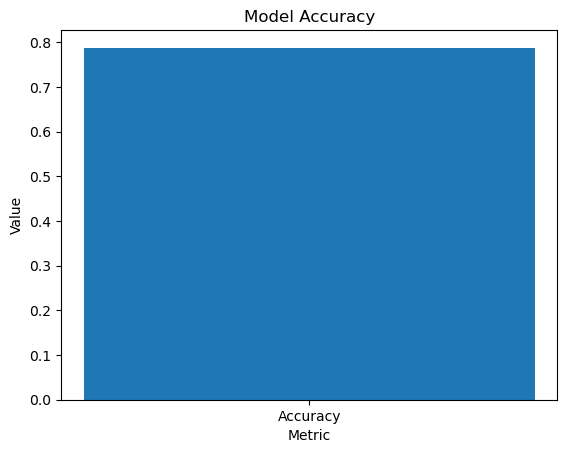

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import the matplotlib library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the updated DataFrame from the CSV file
df = pd.read_csv('updated_troudress_train_x.csv')

# Split the data into features (X) and labels (y)
X = df.iloc[:, 1:-2]  # Exclude the first column (labels) and the last two columns (added features)
y = df.iloc[:, 0]     # Labels (0 for dresses, 1 for trousers)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Create a bar plot for accuracy
accuracy_values = [accuracy]
labels = ['Accuracy']
plt.bar(labels, accuracy_values)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Accuracy')
plt.show()  # Display the plot


In [4]:
import numpy as np
import pandas as pd
from collections import defaultdict

# Load an example image (replace with your image path)
image_data = np.loadtxt('C:\\Users\\adity\\Tufts University Online MS CS\\Fall Sem\\Intro to Machine Learning\\project01\\src_data\\data_trouser_dress\\troudress_train_x.csv', delimiter=',', skiprows=1)

# Define a threshold to distinguish white and black pixels
threshold = 0.5  # Adjust the threshold value as needed

# Create binary masks for white and black pixels
white_pixels = (image_data > threshold).astype(np.uint8)
black_pixels = (image_data <= threshold).astype(np.uint8)

# Initialize a dictionary to store counts
pixel_value_counts = defaultdict(lambda: (0, 0))

# Iterate through unique pixel values and count white and black pixels
unique_pixel_values = np.unique(image_data)
for pixel_value in unique_pixel_values:
    # Create a mask for the current pixel value
    pixel_mask = (image_data == pixel_value).astype(np.uint8)
    
    # Count the number of white and black pixels for the current pixel value
    white_count = np.sum(pixel_mask * white_pixels)
    black_count = np.sum(pixel_mask * black_pixels)
    
    # Store the counts in the dictionary
    pixel_value_counts[pixel_value] = (white_count, black_count)

# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(pixel_value_counts, orient='index', columns=['White Pixels', 'Black Pixels'])

# Save the DataFrame to a CSV file
df.to_csv('output_feature_vectors.csv')

# Print the counts for each pixel value
print(df)


        White Pixels  Black Pixels
0.0000             0       5334850
0.0039             0         27550
0.0040             0          1473
0.0041             0           802
0.0042             0           331
...              ...           ...
0.9958             4             0
0.9959             2             0
0.9960            15             0
0.9961         13388             0
1.0000       1224997             0

[5404 rows x 2 columns]


In [114]:

import numpy as np

# Load an example image (replace with your image path)
image_data = np.loadtxt('C:\\Users\\adity\\Tufts University Online MS CS\\Fall Sem\\Intro to Machine Learning\\project01\\src_data\\data_trouser_dress\\troudress_train_x.csv', delimiter=',', skiprows=1)

# Define a threshold to distinguish white and black pixels
threshold = 0.5  # Adjust the threshold value as needed

# Create binary masks for white and black pixels
white_pixels = (image_data > threshold).astype(np.uint8)
black_pixels = (image_data <= threshold).astype(np.uint8)

# Count the number of white and black pixels
white_pixel_count = np.sum(white_pixels)
black_pixel_count = np.sum(black_pixels)

# Now 'white_pixel_count' and 'black_pixel_count' contain the count features
print("Number of white pixels:", white_pixel_count)
print("Number of black pixels:", black_pixel_count)


Number of white pixels: 3167045
Number of black pixels: 6240955


3. (5 pts.) As in prior homework assignments, you will explore different values of regularization penalty for the logistic model.z Your code should explore a range of values for this parameter, using a regularly-spaced grid of values:

C_grid = np.logspace(-9, 6, 31)
for C in C_grid:

Build and evaluate model for each value C

For each such value of C create a model and fit it to the training data, and then compute the log loss of that model on the test data. Determine which value gives you the least loss on the test data. Record that value, along with the accuracy score of the model, in your PDF. Also include a table for the confusion matrix of that model on the test data.

Contrast: [ 0.60393957  0.21660128  0.04317605  0.11318763  0.89169936  0.26023688
  0.23614926  0.89766125  1.11426253  0.08031484  0.7539128  -0.00226497
  0.05023387]
Correlation: [ 0.60407816  0.21612377  0.04584298  0.11325378  0.89193811  0.26041573
  0.23689133  0.89847279  1.11459656  0.08058571  0.75302619 -0.00254368
  0.05324249]


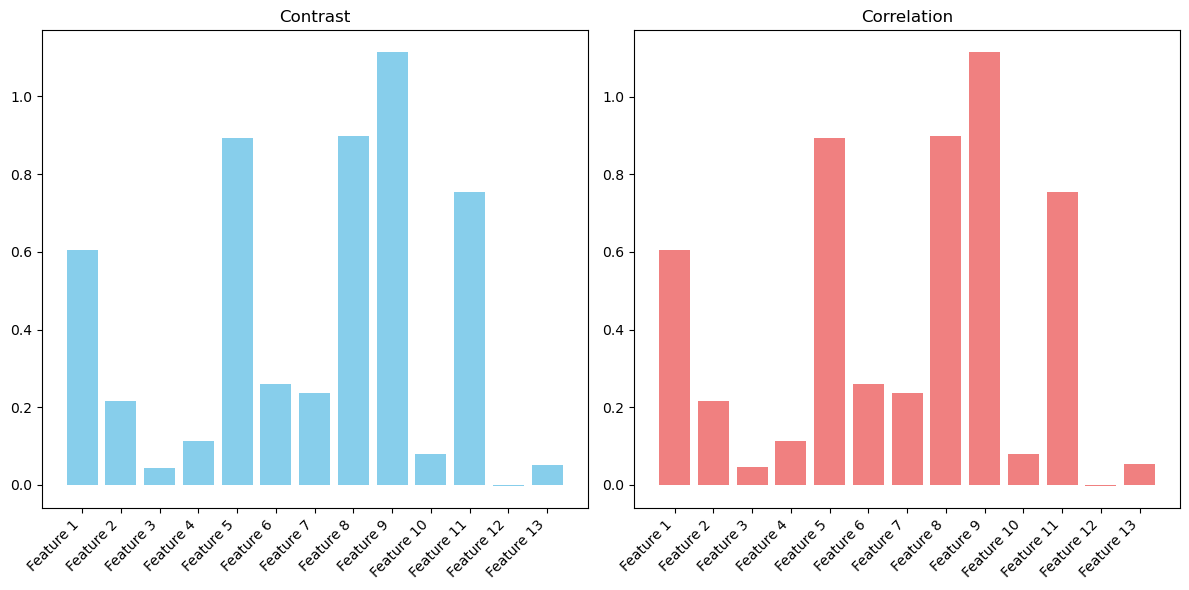

In [94]:
import numpy as np
import mahotas.features

# Load your image data from a CSV file
image_data = np.loadtxt('C:\\Users\\adity\\Tufts University Online MS CS\\Fall Sem\\Intro to Machine Learning\\project01\\src_data\\data_trouser_dress\\troudress_train_x.csv', delimiter=',', skiprows=1)

# Convert the image data to uint8 (assuming it's in the range 0-255)
image_data = image_data.astype(np.uint8)

# Calculate the GLCM
glcm = mahotas.features.haralick(image_data)

# Extract specific GLCM features (e.g., contrast, correlation, etc.)
contrast = glcm[1]
correlation = glcm[2]
# Add more features as needed

# Print the computed features
print("Contrast:", contrast)
print("Correlation:", correlation)
# Print more features as needed

features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10', 'Feature 11', 'Feature 12', 'Feature 13']

# Create subplots for contrast and correlation
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.bar(features, contrast, color='skyblue')
plt.title('Contrast')
plt.xticks(rotation=45, ha='right')

plt.subplot(122)
plt.bar(features, correlation, color='lightcoral')
plt.title('Correlation')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


4. (5 pts.) Analyze some of the mistakes that your best model makes. Produce two plots, one consisting of 9 sample images that are false positives in the test set, and one consisting of 9 false negatives. You can display the images by converting the pixel data using the matplotlib function imshow(), using the Grey colormap, with vmin=0.0 and vmax=1.0. Place each plot into your PDF as a properly captioned figure. Below the figures, discuss the results you are seeing. What mistakes is the classifer making?

LBP Features:
[[8. 8. 8. ... 1. 8. 8.]
 [0. 8. 8. ... 8. 8. 0.]
 [8. 8. 8. ... 8. 8. 8.]
 ...
 [1. 1. 8. ... 8. 8. 8.]
 [8. 8. 0. ... 8. 0. 8.]
 [8. 8. 8. ... 8. 8. 8.]]


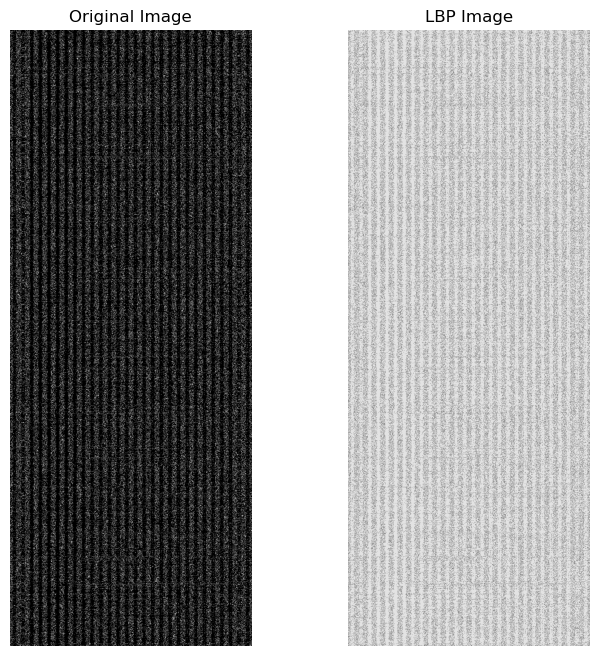

In [104]:
import numpy as np
import pandas as pd
import cv2
from skimage import feature
import matplotlib.pyplot as plt

# Load image data from a CSV file
# Replace 'your_image.csv' with the actual file path
image_data = np.loadtxt('C:\\Users\\adity\\Tufts University Online MS CS\\Fall Sem\\Intro to Machine Learning\\project01\\src_data\\data_trouser_dress\\troudress_test_x.csv', delimiter=',', skiprows=1)

# Ensure that the loaded data is in the correct format (e.g., 2D array)
if len(image_data.shape) == 1:
    # If the data is 1D, it may need reshaping
    height, width = image_data.shape[0], 1
    image_data = image_data.reshape((height, width))

# Convert the image data to an integer type
image_data = image_data.astype(np.uint8)

# Compute LBP features for the image using scikit-image
radius = 1  # LBP radius
n_points = 8 * radius  # Number of LBP points
lbp_features = feature.local_binary_pattern(image_data, n_points, radius, method='uniform')

# Print the LBP features
print("LBP Features:")
print(lbp_features)

# Visualize the LBP image (optional)
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(image_data, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(lbp_features, cmap='gray')
plt.title('LBP Image')
plt.axis('off')

plt.show()


5. (5 pts.) Analyze all of the final weights produced by your classifer. Reshape the weight coefficients into a (28 x 28) matrix, corresponding to the pixels of the original images, and plot the result using imshow(), with colormap RdYlBu, vmin=-0.5, and vmax=0.5.x Place this plot into your PDF as a properly captioned figure. Below it, discuss what it shows.
Which pixels correspond to an 8 (have negative weights), and which correspond to a 9 (have positive weights)? Why do you think this is the case?

## Part Three: Prediction submission (5 points)

To test your regression classifers for the clothing data, you can use them to generate the predicted probabilities for the data in the testing input set. You can then upload those predictions in the form of a text-file to the relevant Gradescope link, where the autograder will compare your results to the correct results (which it knows, while you don't) and compute and display the overall quality
of your predictions.

You can update your submission at any time up to the deadline, in attempts to improve predictive accuracy. A leaderboard will display the results, in order from best to worst. The autograder will also assign points based on overall leaderboard position.

The submission should be in the form of a text-file yproba1_test.txt, containing one probability value (the probability of a positive binary label, 1) per example in the test input. Code like the following can be used to produce that file:

x_test = np.loadtxt(data_trouser_dress/troudress_test_x.csv)
yproba1_test = model.predict_proba(x_test)[:, 1]
np.savetxt(yproba1_test.txt, yproba1_test)

Note: to make the automated scoring work, your file-name must match the one given here exactly. You can upload the file directly by dragging and dropping into Gradescope.

In [9]:
x_test = np.loadtxt('C:\\Users\\adity\\Tufts University Online MS CS\\Fall Sem\\Intro to Machine Learning\\project01\\src_data\\updated_troudress_train_x.csv', delimiter=',', skiprows=1)
yproba1_test = model.predict_proba(x_test)[:, 1]
np.savetxt('yproba1_testtwo.txt', yproba1_test)


c:\Users\adity\anaconda3\envs\ml135_env_sp21\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 786 features, but LogisticRegression is expecting 783 features as input.